# CSCI 532 Semester Project Demonstration and Analysis

James Avery

## Problem #3

>Write a C/C++/Matlab/Java program to compute insertion sort and merge sort. (You can use the code from the textbooks by Deitel and Deitel or from the web.) Obtain the run time of both routines.

>The input data should be an int array containing random element values (between, say, 0 and 1023). Obtain run time T with 1D (input) array of size of $n = 16$, $256$, $4096$, $65536$, $1048576$ (i.e. $2^p$, where $p = 4$, $8$, $12$, $16$, $20$). The run time for each $n$ should be averaged with about $\left\lfloor{\frac{512}{p \times p}}\right\rfloor$ runs. Each run for a given $n$ should use a different random input.

>Plot (with Excel, Matlab, or other available tools) the run time for both routines on one plot, with the $x$ axis in $p$ values, and $y$ axis in $\log{T}$. Label on the plot which curve is for insertion sort and which is for merge sort.

>Submit C/C++ programs and plot, with instructions in readme.txt on how to build and run the program. (Include the Dev-C++/MS Visual Studio/Java NetBeans project file.)

In addition to the above, I also added a number of command line arguments to make testing more interactive:
* `insertion-only`: Prevents merge sort from being run
* `merge-only`: Prevents insertion sort from being run
* `equal-batches`: Instead of running each sort $\left\lfloor\frac{512}{p\times{p}}\right\rfloor$ times, run in equal-sized batches. This takes a lot longer, but allows for more accurate analysis, as well as processing run-time data in Python using NumPy
* `limit-n`: Limits the size of arrays to those that run quickly, i.e., arrays smaller than around 1 million items. This speeds testing the algorithms' run-times, especially when `equal-batches` is also used.
* `demo-sorters`: Demonstrates the sorting routines (specifically that they actually do sort arrays).
* `no-time`: Does not obtain run-times for the sorting algorithms (i.e. does not do what the assignment requires, in order to shorten run-times for `demo-sorters`.)

## Build the project

In Linux the program may be built at the command line by typing

```
g++ -std="c++14" main.cpp -o main
```

In Windows, the program must be built using the Visual Studio Command Prompt with the command

```
cl main.cpp
```

The code cell below checks to see if the executable exists, and builds it if it does not.

In [1]:
import os
import platform

# Determine which operating system we're running under
linux = platform.system() == "Linux"
windows = platform.system() == "Windows"

# Determine if an executable exists
main_exists = os.access("main", os.F_OK)
mainexe_exists = os.access("main.exe", os.F_OK)

# Determine if the executable is actually executable
main_is_executable = os.access("main", os.X_OK)
mainexe_is_executable = os.access("main.exe", os.X_OK)

# If the file does not exist or is not executable, then build it
if linux and main_is_executable:
    print("Executable exists for Linux.")
elif linux and (not main_is_executable or not main_exists):
    print("Building for Linux")
    ! g++ -std="c++14" main.cpp -o main
    print("Done.")
elif windows and mainexe_is_executable:
    print("Executable exists for Windows.")
elif windows and (not mainexe_is_executable or not mainexe_exists):
    print("Building for Windows")
    ! cl main.exe
    print("Done.")
else:
    print("Either this is an unsupported OS, or something else is wrong.")

Building for Linux
Done.


## Demonstrate that the sorters sort correctly

Using a combination of the `demo-sorters` and `no-time` command line arguments, it is possible to demonstrate that the insertion sort and merge sort functions do indeed sort arrays into nondecreasing order.

### Insertion Sort

In [2]:
if linux:
    ! ./main demo-sorters insertion-only no-time
elif windows:
    ! main.exe demo-sorters merge-only no-time


=====  Demonstrating Insertion Sort  =====

Before: 852 71 330 999 619 77 981 502 205 606 
After: 71 77 205 330 502 606 619 852 981 999 

Before: 147 894 491 281 792 474 951 26 829 479 
After: 26 147 281 474 479 491 792 829 894 951 

Before: 30 868 55 311 522 13 400 781 1006 49 
After: 13 30 49 55 311 400 522 781 868 1006 

Before: 209 184 63 312 564 365 148 723 353 794 
After: 63 148 184 209 312 353 365 564 723 794 

Before: 29 827 926 363 57 620 345 792 916 638 
After: 29 57 345 363 620 638 792 827 916 926 

Before: 836 527 238 731 213 195 616 1014 243 437 
After: 195 213 238 243 437 527 616 731 836 1014 

Before: 309 321 696 648 654 208 720 490 370 68 
After: 68 208 309 321 370 490 648 654 696 720 

Before: 530 785 98 580 928 713 930 685 88 930 
After: 88 98 530 580 685 713 785 928 930 930 

Before: 531 194 587 811 335 838 240 509 706 567 
After: 194 240 335 509 531 567 587 706 811 838 

Before: 525 557 567 337 988 228 161 35 868 185 
After: 35 161 185 228 337 525 557 567 868 988 


### Merge Sort

In [3]:
if linux:
    ! ./main demo-sorters merge-only no-time
elif windows:
    ! main.exe demo-sorters merge-only no-time


=====  Demonstrating Merge Sort  =====

Before: 167 604 384 743 262 948 14 159 365 227 
After: 14 159 167 227 262 365 384 604 743 948 

Before: 271 91 431 854 260 872 867 590 917 13 
After: 13 91 260 271 431 590 854 867 872 917 

Before: 375 762 454 798 153 65 600 584 586 674 
After: 65 153 375 454 584 586 600 674 762 798 

Before: 446 641 819 200 174 240 699 119 165 702 
After: 119 165 174 200 240 446 641 699 702 819 

Before: 461 242 614 527 969 160 612 7 22 378 
After: 7 22 160 242 378 461 527 612 614 969 

Before: 694 692 727 189 892 460 715 468 89 382 
After: 89 189 382 460 468 692 694 715 727 892 

Before: 352 782 765 968 60 1 593 944 166 123 
After: 1 60 123 166 352 593 765 782 944 968 

Before: 987 785 406 276 990 306 937 32 363 211 
After: 32 211 276 306 363 406 785 937 987 990 

Before: 77 52 615 725 567 256 549 787 528 533 
After: 52 77 256 528 533 549 567 615 725 787 

Before: 604 281 128 811 580 213 320 965 866 728 
After: 128 213 281 320 580 604 728 811 866 965 


## Find Run-Times

This is the main part of project as assigned. Running both sorts takes approximately one hour on a fast computer.

### Insertion Sort

In [4]:
if linux:
    ! ./main insertion-only
elif windows:
    ! main.exe insertion-only


Insertion Sort
16	1303	902	859	884	761	886	787	778	920	816	817	806	783	812	771	763	781	829	737	740	962	696	981	894	761	857	924	880	844	608	859	848	
256	115302	355001	145560	109510	161765	356600	107974	162201	
4096	21620272	21185237	22373441	
65536	5421502820	5638121265	
1048576	1330612247603	


### Merge Sort

In [5]:
if linux:
    !./main merge-only
elif windows:
    ! main.exe merge-only


Merge Sort
16	7192	4528	4510	4307	4529	7460	4362	4328	4412	4302	4431	4344	4549	4474	4371	4458	4560	4513	4445	4292	4502	4414	4465	4532	4191	4075	4111	4414	4381	4262	4349	4532	
256	210621	212145	211557	278553	308630	186463	172185	179669	
4096	27312003	25968680	26569605	
65536	5848871422	5819882815	
1048576	1485711308521	


## Prepare the data for processing

Load the run-times into Pandas dataframes for processing.

In [29]:
import numpy as np
import pandas as pd
import IPython as ipy

insertion = pd.read_table('./insertionsort.csv', usecols=range(25), header=None, index_col=0)
merge = pd.read_table('./mergesort.csv', usecols=range(25), header=None, index_col=0)

#### Insertion Sort Run Times

In [38]:
ipy.display.display(
    ipy.display.HTML(
        insertion.to_html(na_rep='', max_cols=15, header=False)))

16,1303,9.020000e+02,859.0,884.0,761.0,886.0,787.0,...,829.0,737.0,740.0,962.0,696.0,981.0,894.0
256,115302,3.550010e+05,145560.0,109510.0,161765.0,356600.0,107974.0,...,,,,,,,
4096,21620272,2.118524e+07,22373441.0,,,,,...,,,,,,,
65536,5421502820,5.638121e+09,,,,,,...,,,,,,,
1048576,1330612247603,,,,,,,...,,,,,,,


#### Merge Sort Run Times

In [97]:
ipy.display.display(
    ipy.display.HTML(
        merge.to_html(na_rep='', max_cols=15, header=False)))

16,7192,4.528000e+03,4510.0,4307.0,4529.0,7460.0,4362.0,...,4513.0,4445.0,4292.0,4502.0,4414.0,4465.0,4532.0
256,210621,2.121450e+05,211557.0,278553.0,308630.0,186463.0,172185.0,...,,,,,,,
4096,27312003,2.596868e+07,26569605.0,,,,,...,,,,,,,
65536,5848871422,5.819883e+09,,,,,,...,,,,,,,
1048576,1485711308521,,,,,,,...,,,,,,,


Calculate the mean of each row, discarding missing columns.

In [120]:
insertion_mean = insertion.mean(axis=1).as_matrix()
merge_mean = merge.mean(axis=1).as_matrix()

The data is stored in rows of the format $n, r_1, r_2, \ldots r_i$, where $n$ is the size of the array, and $r_i$ is the run-time in nanoseconds of the $i^{\textrm{th}}$ run, so extract the first row as $x$ values for the graph.

In [121]:
insertion_xs = insertion.index.tolist()
merge_xs = merge.index.tolist()

if insertion_xs != merge_xs:
    raise ValueError(
        "The two data sets were not tested on arrays of the same sizes." +
            "\n\tInsertion Sort was tested with arrays of sizes:\n\t\t" +
            str(insertion_xs) +
           "\n\tMerge Sort was tested with arrays of sizes:\n\t\t" +
            str(merge_xs))
else:
    xs = np.array(insertion_xs.copy())
    del insertion_xs, merge_xs

## Graph the results

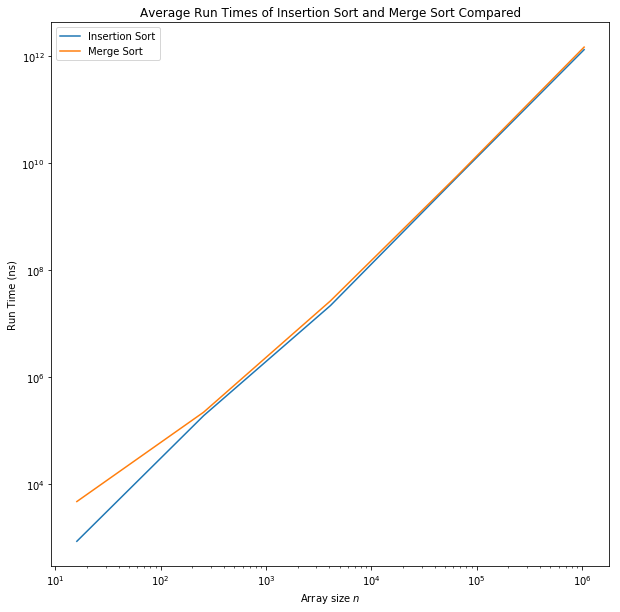

| $n$ | Insertion Sort | Merge Sort |
|:---|:---:|:---:|
| 16 | 844.5 | 4678.3 |
| 256 | 1.8924e+05 | 2.1998e+05 |
| 4096 | 2.1726e+07 | 2.6617e+07 |
| 65536 | 5.5298e+09 | 5.8344e+09 |
| 1048576 | 1.3306e+12 | 1.4857e+12 |


In [119]:
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(xs, insertion_mean, label='Insertion Sort')
plt.plot(xs, merge_mean, label='Merge Sort')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Array size $n$")
plt.ylabel('Run Time (ns)')
plt.title("Average Run Times of Insertion Sort and Merge Sort Compared")
plt.show()

table = "| $n$ | Insertion Sort | Merge Sort |\n|:---|:---:|:---:|\n"
for i in range(len(xs)):
    table += "| {n} | {ins:.5} | {ms:.5} |\n".format(
        n=xs[i], 
        ins=insertion_mean[i], 
        ms=merge_mean[i]
    )
IPython.display.Markdown(table)

## Notebook Cleanup/Additional Information

### This document was created with the following software versions:

In [37]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.4.final.0
python-bits: 64
OS: Linux
OS-release: 4.13.0-38-lowlatency
machine: x86_64
processor: x86_64
byteorder: little
LC_ALL: None
LANG: en_US.UTF-8
LOCALE: en_US.UTF-8

pandas: 0.22.0
pytest: 3.3.2
pip: 9.0.1
setuptools: 38.4.0
Cython: 0.27.3
numpy: 1.14.0
scipy: 1.0.0
pyarrow: None
xarray: None
IPython: 6.2.1
sphinx: 1.6.6
patsy: 0.5.0
dateutil: 2.6.1
pytz: 2017.3
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.4
feather: None
matplotlib: 2.1.2
openpyxl: 2.4.10
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.1
bs4: 4.6.0
html5lib: 0.9999999
sqlalchemy: 1.2.1
pymysql: None
psycopg2: None
jinja2: 2.10
s3fs: None
fastparquet: None
pandas_gbq: None
pandas_datareader: None


In [36]:
%%javascript
// Hide "In [*]" prompts in notebook.
$('div.prompt').hide();

<IPython.core.display.Javascript object>